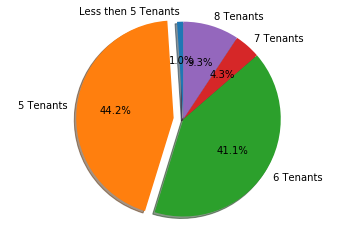

In [1]:
from pandas.io.json import json_normalize
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.gridspec import GridSpec

client = MongoClient()
db = client.test
collection = db['HmoListHillingdon']
cursor = list(collection.find({}, {'_id': False}))
result = json_normalize(cursor)
lessthenfive=0
fiveTenants=0
sixtenants=0
seventenents=0
greaterthenseven=0

for index, row in result.iterrows():
    if int(row['Tenants']) < 5:
        lessthenfive=lessthenfive+1
    if int(row['Tenants']) == 5:
        fiveTenants=fiveTenants+1
    elif int(row['Tenants']) == 6:
        sixtenants=sixtenants+1
    elif int(row['Tenants']) == 7:
        seventenents=seventenents+1
    elif int(row['Tenants']) > 7:
        greaterthenseven=greaterthenseven+1

labels =  'Less then 5 Tenants', '5 Tenants', '6 Tenants', '7 Tenants', '8 Tenants' 
sizes = [lessthenfive,fiveTenants, sixtenants, seventenents,greaterthenseven]
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


